# Mohamed Maaz Rehan 

# email - md.maaz.1992@gmail.com 

# phone - +91 9945263606

# Wordclould and Sentiment Analysis using text data - British Airline Reviews

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  ✅ Trip Verified |  My family and I have flown ...
1  ✅ Trip Verified |  This has been by far the wo...
2  ✅ Trip Verified |  In Nov 2022 I booked and pa...
3  Not Verified | BA is not treating its premium ...
4  ✅ Trip Verified |  24 hours before our departu...

In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Import necessary libraries

In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

In [6]:
# To display all rows
pd.set_option('display.max_rows', None)

In [7]:
# importing file 

df = pd.read_csv('BA_reviews.csv')

In [8]:
# To check the top 5 rows

df.head()

Unnamed: 0                                            reviews
0           0  ✅ Trip Verified |  My family and I have flown ...
1           1  ✅ Trip Verified |  This has been by far the wo...
2           2  ✅ Trip Verified |  In Nov 2022 I booked and pa...
3           3  Not Verified | BA is not treating its premium ...
4           4  ✅ Trip Verified |  24 hours before our departu...

In [9]:
# Drop Unnamed column

df.drop(columns='Unnamed: 0', axis=1)

reviews
0    ✅ Trip Verified |  My family and I have flown ...
1    ✅ Trip Verified |  This has been by far the wo...
2    ✅ Trip Verified |  In Nov 2022 I booked and pa...
3    Not Verified | BA is not treating its premium ...
4    ✅ Trip Verified |  24 hours before our departu...
5    ✅ Trip Verified |  We arrived at Heathrow at 0...
6    ✅ Trip Verified |  Original flight was cancell...
7    Not Verified |  Airport check in was functiona...
8    ✅ Trip Verified |  Flight fine. In-line with c...
9    ✅ Trip Verified |  Came from Glasgow to London...
10   ✅ Trip Verified |  My flight on on 12 May 2023...
11   Not Verified |  Cairo is a 5 hour flight and B...
12   ✅ Trip Verified |  After travelling London to ...
13   ✅ Trip Verified |  My luggage was mis-tagged i...
14   ✅ Trip Verified |  The airline lost my luggage...
15   ✅ Trip Verified |  We booked on the BA website...
16   ✅ Trip Verified |  First time flying with BA b...
17   Not Verified | You can buy sandwiches and cris...
18   ✅ Trip Verified |  This is a two-for-one revie...
19   ✅ Trip Verified | Absolutely horrible airline....
20   ✅ Trip Verified |  Having experienced delays a...
21   ✅ Trip Verified | Travelled to Heathrow to Kal...
22   Not Verified |  This flight failed at every le...
23   Not Verified |  Beware of British Airways and ...
24   ✅ Trip Verified |  I flew from Cairo to Heathr...
25   Not Verified | I flew with numerous airlines, ...
26   ✅ Trip Verified |  We were traveling as a fami...
27   ✅ Trip Verified | Flight at 8.40am from DUB to...
28   ✅ Trip Verified |  Terrible. I have traveled t...
29   ✅ Trip Verified |  The customer service is ugl...
30   ✅ Trip Verified |  Most uncomfortable flight I...
31   ✅ Trip Verified |  I booked our first out of c...
32   ✅ Trip Verified | My husband and I booked seat...
33   Not Verified |  May 3, flew from Seattle to He...
34   ✅ Trip Verified | I went through three flights...
35   ✅ Trip Verified | An excellent flight in Club ...
36   ✅ Trip Verified | The flight schedule was dela...
37   ✅ Trip Verified | The worst experience in all ...
38   ✅ Trip Verified |  The worst experience in all...
39   ✅ Trip Verified |  Terrible delays. Had to reb...
40   ✅ Trip Verified |  A serious medical problem a...
41   ✅ Trip Verified |  I haven't flown British Air...
42   Not Verified |  My itinerary was supposed to b...
43   ✅ Trip Verified |  Busy day at LHR and flight ...
44   ✅ Trip Verified | Worst seats I have ever enco...
45   Not Verified | Top Ten REASONS to not use Brit...
46   Not Verified |  Easy check in on the way to He...
47   ✅ Trip Verified |  Online check in worked fine...
48   ✅ Trip Verified |. The BA first lounge at Term...
49   Not Verified | Paid a quick visit to Nice yest...
50   ✅ Trip Verified |  Words fail to describe this...
51   ✅ Trip Verified |  Absolutely terrible experie...
52   ✅ Trip Verified | BA overbook every flight to ...
53   ✅ Trip Verified |  \r\nThe flights were all on...
54   Not Verified | Only the second time flying BA ...
55   ✅ Trip Verified | I wasn't going to bother rev...
56   ✅ Trip Verified |  I booked business class tic...
57   ✅ Trip Verified |  I will never travel with Br...
58   ✅ Trip Verified |  I am already in Portugal so...
59   ✅ Trip Verified |  Terrible. Avoid this airlin...
60   ✅ Trip Verified |  Despite being a gold member...
61   Not Verified | Regarding the aircraft and seat...
62   Not Verified | I travelled with British Airway...
63   Not Verified |  Food was lousy. Who ever is pl...
64   ✅ Trip Verified | Had the worst experience. Th...
65   ✅ Trip Verified |  The ground staff were not h...
66   ✅ Trip Verified |  Second time BA Premium Econ...
67   Not Verified |  They changed our Flights from ...
68   Not Verified |  At Copenhagen the most chaotic...
69   ✅ Trip Verified |  Worst experience of my life...
70   ✅ Trip Verified |  Due to code sharing with Ca...
71   ✅ Trip Verified |  LHR check in was quick at t...
72   ✅ Trip Verified |  I wouldn

In [10]:
# spilt the data

df = df["reviews"].str.split("|", n = 1, expand = True)

In [11]:
# Check the top 5 rows

df.head()

0                                                  1
0  ✅ Trip Verified     My family and I have flown mostly on British...
1  ✅ Trip Verified     This has been by far the worst service I hav...
2  ✅ Trip Verified     In Nov 2022 I booked and paid for a return j...
3     Not Verified    BA is not treating its premium economy passen...
4  ✅ Trip Verified     24 hours before our departure on BA059 to Ca...

In [12]:
# rename the columns 

df.columns = ['trip status', 'reviews']

In [13]:
df.head()

trip status                                            reviews
0  ✅ Trip Verified     My family and I have flown mostly on British...
1  ✅ Trip Verified     This has been by far the worst service I hav...
2  ✅ Trip Verified     In Nov 2022 I booked and paid for a return j...
3     Not Verified    BA is not treating its premium economy passen...
4  ✅ Trip Verified     24 hours before our departure on BA059 to Ca...

In [14]:
# To count trip verified and not verified customers

df['trip status'].value_counts()

✅ Trip Verified     801
Not Verified        197
❎ Not Verified        2
Name: trip status, dtype: int64

[Text(0, 0, '801'), Text(0, 0, '197'), Text(0, 0, '2')]

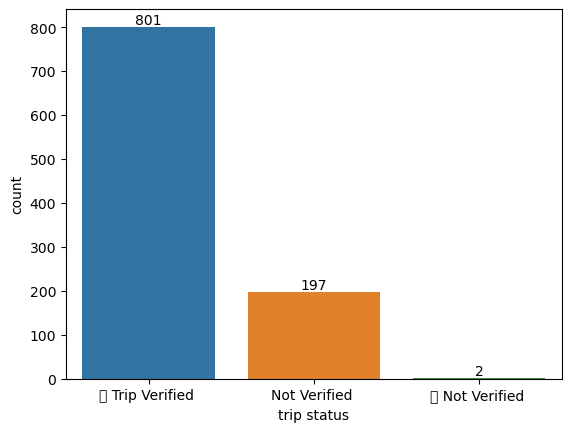

In [15]:
# Data visualization

a = sns.countplot(df['trip status'])
a
a.bar_label(a.containers[0])

In [16]:
# consider reviews column

df = df['reviews']

In [17]:
df.head()

0      My family and I have flown mostly on British...
1      This has been by far the worst service I hav...
2      In Nov 2022 I booked and paid for a return j...
3     BA is not treating its premium economy passen...
4      24 hours before our departure on BA059 to Ca...
Name: reviews, dtype: object

In [18]:
# convert into dataframe

df = pd.DataFrame(data = df)

In [19]:
df.head()

reviews
0    My family and I have flown mostly on British...
1    This has been by far the worst service I hav...
2    In Nov 2022 I booked and paid for a return j...
3   BA is not treating its premium economy passen...
4    24 hours before our departure on BA059 to Ca...

# Text cleaning

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [22]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['reviews'] = df['reviews'].apply(lambda x: remove_punct(x))
df.head()

reviews
0    My family and I have flown mostly on British...
1    This has been by far the worst service I hav...
2    In Nov  I booked and paid for a return journ...
3   BA is not treating its premium economy passen...
4     hours before our departure on BA to Cape To...

The Wordcloud package requires the text you provide to be a single string, rather than the column of a dataframe. The easiest way to convert your column data to a single string is to use a for loop with a join. This gives us a massive string containing all of the words in the whole Pandas series.

In [23]:
text = " ".join(item for item in df['reviews'])

In [24]:
text

'  My family and I have flown mostly on British Airways for the last  years I am a priority passenger and fly often enough to recognise cabin crew and know some by name They used to be a really good airline to fly with Things have really deteriorated with their face to face customer care since the pandemic The aircraft look worn For example on my flight back my audiovisual equipment did not work and had to be reset twice finally working in the last hour before we landed The second time around I think the reset was done for the whole aircraft The touch screen function on my screen did not work The USB charger ports on my seat did not work The staff were pleasant enough but their service oozed mediocrity  There did not seem to be much pride in what they were doing The food has been the worst part on our BA flights since the pandemic They gave us a menu asked what we’d like did a check and then told us that it was not available as they had run out and would we like to choose something els

In [25]:
## Let us now convert this data in lowercase

clean_data1 = text.lower()
clean_data1

'  my family and i have flown mostly on british airways for the last  years i am a priority passenger and fly often enough to recognise cabin crew and know some by name they used to be a really good airline to fly with things have really deteriorated with their face to face customer care since the pandemic the aircraft look worn for example on my flight back my audiovisual equipment did not work and had to be reset twice finally working in the last hour before we landed the second time around i think the reset was done for the whole aircraft the touch screen function on my screen did not work the usb charger ports on my seat did not work the staff were pleasant enough but their service oozed mediocrity  there did not seem to be much pride in what they were doing the food has been the worst part on our ba flights since the pandemic they gave us a menu asked what we’d like did a check and then told us that it was not available as they had run out and would we like to choose something els

In [26]:
## Cleaning the punctuations

clean_data2 = re.sub(r'[^\w\s]','',clean_data1)
clean_data2

'  my family and i have flown mostly on british airways for the last  years i am a priority passenger and fly often enough to recognise cabin crew and know some by name they used to be a really good airline to fly with things have really deteriorated with their face to face customer care since the pandemic the aircraft look worn for example on my flight back my audiovisual equipment did not work and had to be reset twice finally working in the last hour before we landed the second time around i think the reset was done for the whole aircraft the touch screen function on my screen did not work the usb charger ports on my seat did not work the staff were pleasant enough but their service oozed mediocrity  there did not seem to be much pride in what they were doing the food has been the worst part on our ba flights since the pandemic they gave us a menu asked what wed like did a check and then told us that it was not available as they had run out and would we like to choose something else

In [27]:
# removing the digits

clean_data3 = re.sub(r'\d+', ' ', clean_data2)
clean_data3

'  my family and i have flown mostly on british airways for the last  years i am a priority passenger and fly often enough to recognise cabin crew and know some by name they used to be a really good airline to fly with things have really deteriorated with their face to face customer care since the pandemic the aircraft look worn for example on my flight back my audiovisual equipment did not work and had to be reset twice finally working in the last hour before we landed the second time around i think the reset was done for the whole aircraft the touch screen function on my screen did not work the usb charger ports on my seat did not work the staff were pleasant enough but their service oozed mediocrity  there did not seem to be much pride in what they were doing the food has been the worst part on our ba flights since the pandemic they gave us a menu asked what wed like did a check and then told us that it was not available as they had run out and would we like to choose something else

In [28]:
# lets remove stopwords - words that frequenty occur in sentence and carry no significant meaning in sentence

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [30]:
from nltk.tokenize import word_tokenize
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
tokens = word_tokenize(clean_data3)

In [33]:
clean_data4 = [i for i in tokens if not i in stop_words]

In [34]:
clean_data4

['family',
 'flown',
 'mostly',
 'british',
 'airways',
 'last',
 'years',
 'priority',
 'passenger',
 'fly',
 'often',
 'enough',
 'recognise',
 'cabin',
 'crew',
 'know',
 'name',
 'used',
 'really',
 'good',
 'airline',
 'fly',
 'things',
 'really',
 'deteriorated',
 'face',
 'face',
 'customer',
 'care',
 'since',
 'pandemic',
 'aircraft',
 'look',
 'worn',
 'example',
 'flight',
 'back',
 'audiovisual',
 'equipment',
 'work',
 'reset',
 'twice',
 'finally',
 'working',
 'last',
 'hour',
 'landed',
 'second',
 'time',
 'around',
 'think',
 'reset',
 'done',
 'whole',
 'aircraft',
 'touch',
 'screen',
 'function',
 'screen',
 'work',
 'usb',
 'charger',
 'ports',
 'seat',
 'work',
 'staff',
 'pleasant',
 'enough',
 'service',
 'oozed',
 'mediocrity',
 'seem',
 'much',
 'pride',
 'food',
 'worst',
 'part',
 'ba',
 'flights',
 'since',
 'pandemic',
 'gave',
 'us',
 'menu',
 'asked',
 'wed',
 'like',
 'check',
 'told',
 'us',
 'available',
 'run',
 'would',
 'like',
 'choose',
 'someth

In [35]:
# lets club the list

clean_data4 = " ".join(str(x) for x in clean_data4)
clean_data4

'family flown mostly british airways last years priority passenger fly often enough recognise cabin crew know name used really good airline fly things really deteriorated face face customer care since pandemic aircraft look worn example flight back audiovisual equipment work reset twice finally working last hour landed second time around think reset done whole aircraft touch screen function screen work usb charger ports seat work staff pleasant enough service oozed mediocrity seem much pride food worst part ba flights since pandemic gave us menu asked wed like check told us available run would like choose something else told us wed get first choice second service couldnt deliver finally choosing getting whatever food tasteless take part post flight surveys regularly stated avail family fly british airways medium long haul regularly possibly times year us good things flying ba priority customers usually direct flight destinations get good service ground checking lounges use far worst se

In [36]:
## let us remove single letters

clean_data5 = ' '.join(i for i in clean_data4.split() if not (i.isalpha() and len(i)==1))
clean_data5

'family flown mostly british airways last years priority passenger fly often enough recognise cabin crew know name used really good airline fly things really deteriorated face face customer care since pandemic aircraft look worn example flight back audiovisual equipment work reset twice finally working last hour landed second time around think reset done whole aircraft touch screen function screen work usb charger ports seat work staff pleasant enough service oozed mediocrity seem much pride food worst part ba flights since pandemic gave us menu asked wed like check told us available run would like choose something else told us wed get first choice second service couldnt deliver finally choosing getting whatever food tasteless take part post flight surveys regularly stated avail family fly british airways medium long haul regularly possibly times year us good things flying ba priority customers usually direct flight destinations get good service ground checking lounges use far worst se

In [37]:
## Whitespace
clean_data6 = clean_data5.strip()
clean_data6

'family flown mostly british airways last years priority passenger fly often enough recognise cabin crew know name used really good airline fly things really deteriorated face face customer care since pandemic aircraft look worn example flight back audiovisual equipment work reset twice finally working last hour landed second time around think reset done whole aircraft touch screen function screen work usb charger ports seat work staff pleasant enough service oozed mediocrity seem much pride food worst part ba flights since pandemic gave us menu asked wed like check told us available run would like choose something else told us wed get first choice second service couldnt deliver finally choosing getting whatever food tasteless take part post flight surveys regularly stated avail family fly british airways medium long haul regularly possibly times year us good things flying ba priority customers usually direct flight destinations get good service ground checking lounges use far worst se

## Frequency of the words

In [38]:
words_dict = {}

In [39]:
for word in clean_data6.split():
    words_dict[word] = words_dict.get(word, 0)+1
for key in sorted(words_dict):
    print("{}:{}".format(key,words_dict[key]))

aa:8
ab:2
abandon:1
abandoned:3
aberdeen:3
ability:5
able:62
abnormally:1
aboard:7
abreakfast:1
abreast:2
abroad:4
abrupt:2
absence:1
absent:3
absolute:13
absolutely:38
absorbed:2
abu:11
abuja:2
abujaflight:1
abundant:1
abusive:1
abysmal:8
ac:2
accent:4
accents:1
accept:17
acceptable:19
accepted:13
accepting:2
accepts:1
access:26
accessible:1
accessing:1
accident:1
accommodate:2
accommodated:1
accommodating:5
accommodation:14
accommodations:2
accompanied:2
accompanies:1
accompany:2
accomplish:1
accomplishing:1
according:10
accordingly:1
account:13
accountability:3
accountants:1
accra:3
accumulated:1
accurate:2
accuse:1
accused:1
accustomed:1
ache:1
achieve:1
achieved:1
achievement:1
achive:1
acknowledge:1
acknowledged:4
acknowledgement:2
acknowledging:1
acoustics:2
across:31
act:7
acted:3
action:9
active:2
actively:1
activities:1
activity:2
actors:1
actual:6
actually:43
ad:1
adamant:2
adaptive:1
add:31
added:8
adding:3
addition:9
additional:41
additionally:4
additonal:1
addon:1
address

# wordclould

In [40]:
from wordcloud import WordCloud

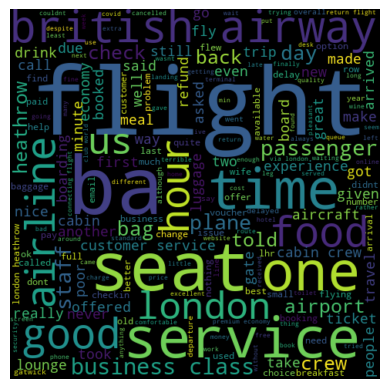

In [42]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(clean_data6)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordclould of British Airways.png")
plt.show()

# Sentiment Analysis

In [43]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [44]:
analyser = SentimentIntensityAnalyzer()

In [45]:
scores = analyser.polarity_scores(clean_data6)

In [46]:
for key in sorted(scores):
    print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 1.0, neg: 0.124, neu: 0.725, pos: 0.152, 

# THANK YOU